[EM1 skip] n=5: ../dipoles_exp_param/runs_Em1/n5_r1.0/params_best.txt
[ 46  10 204  84 184 195 171 208  93  48 121 155   9   7   6 122  86 189
  38 152 188  92 198  97  76 158 211 199   5  55  67  96 113 133 187  71
 149  70  47  61 127 135 162  95 160 130 103 205  58  81 144 161   2 129
 126 101  69  64 111 221 194  12 168 128  53 148  42  32  65 141 106  89
 124 146  16  50 147   8  40 104  90 119 183 203 108 190 213  31 140 105
  79  62 157 185 217 167 200 210 137 176  49 220  63  82 180 192 219   0
 218 115 142  19 209 107  74  36  41 186 216 173  33 110 182  35 165  20
 172 201 164 150  39  52 179 116 181 178 131  17  13 191 145 222  78 224
 223 215  11  15 151 177  87  88 132  26  29 174  60  85  14 139  98  77
  30 197 109 102  22  23 214  27  72 207 114  57  75  56  73 154  25  51
  94  54  45 163  80  28  43  37 136  83  66  24 120   4  68 175  99 138
 206   1 169 112 100  91 166  21 212 123 170 196 193 143  59 159 118  34
 117   3 156 134 202 125  18  44 153]
839.104884544878

n= 8 | EM1 train=nan test=nan  ||  EM2 train=2.174446e-04 test=6.030908e-03
[EM1 skip] n=9: ../dipoles_exp_param/runs_Em1/n9_r1.0/params_best.txt
[ 46  10 204  84 184 195 171 208  93  48 121 155   9   7   6 122  86 189
  38 152 188  92 198  97  76 158 211 199   5  55  67  96 113 133 187  71
 149  70  47  61 127 135 162  95 160 130 103 205  58  81 144 161   2 129
 126 101  69  64 111 221 194  12 168 128  53 148  42  32  65 141 106  89
 124 146  16  50 147   8  40 104  90 119 183 203 108 190 213  31 140 105
  79  62 157 185 217 167 200 210 137 176  49 220  63  82 180 192 219   0
 218 115 142  19 209 107  74  36  41 186 216 173  33 110 182  35 165  20
 172 201 164 150  39  52 179 116 181 178 131  17  13 191 145 222  78 224
 223 215  11  15 151 177  87  88 132  26  29 174  60  85  14 139  98  77
  30 197 109 102  22  23 214  27  72 207 114  57  75  56  73 154  25  51
  94  54  45 163  80  28  43  37 136  83  66  24 120   4  68 175  99 138
 206   1 169 112 100  91 166  21 212 123 170 196 19

n=12 | EM1 train=nan test=nan  ||  EM2 train=1.063208e-04 test=6.088655e-03
[EM1 skip] n=13: ../dipoles_exp_param/runs_Em1/n13_r1.0/params_best.txt
[ 46  10 204  84 184 195 171 208  93  48 121 155   9   7   6 122  86 189
  38 152 188  92 198  97  76 158 211 199   5  55  67  96 113 133 187  71
 149  70  47  61 127 135 162  95 160 130 103 205  58  81 144 161   2 129
 126 101  69  64 111 221 194  12 168 128  53 148  42  32  65 141 106  89
 124 146  16  50 147   8  40 104  90 119 183 203 108 190 213  31 140 105
  79  62 157 185 217 167 200 210 137 176  49 220  63  82 180 192 219   0
 218 115 142  19 209 107  74  36  41 186 216 173  33 110 182  35 165  20
 172 201 164 150  39  52 179 116 181 178 131  17  13 191 145 222  78 224
 223 215  11  15 151 177  87  88 132  26  29 174  60  85  14 139  98  77
  30 197 109 102  22  23 214  27  72 207 114  57  75  56  73 154  25  51
  94  54  45 163  80  28  43  37 136  83  66  24 120   4  68 175  99 138
 206   1 169 112 100  91 166  21 212 123 170 196 

n=16 | EM1 train=nan test=nan  ||  EM2 train=5.530819e-05 test=3.864772e-03
Saved to /Users/anteravlic/Documents/research_2025/Lauren_2025/Lauren_emulator/figs/Emu1_Emu2_alphaD_vs_n_train_test.pdf


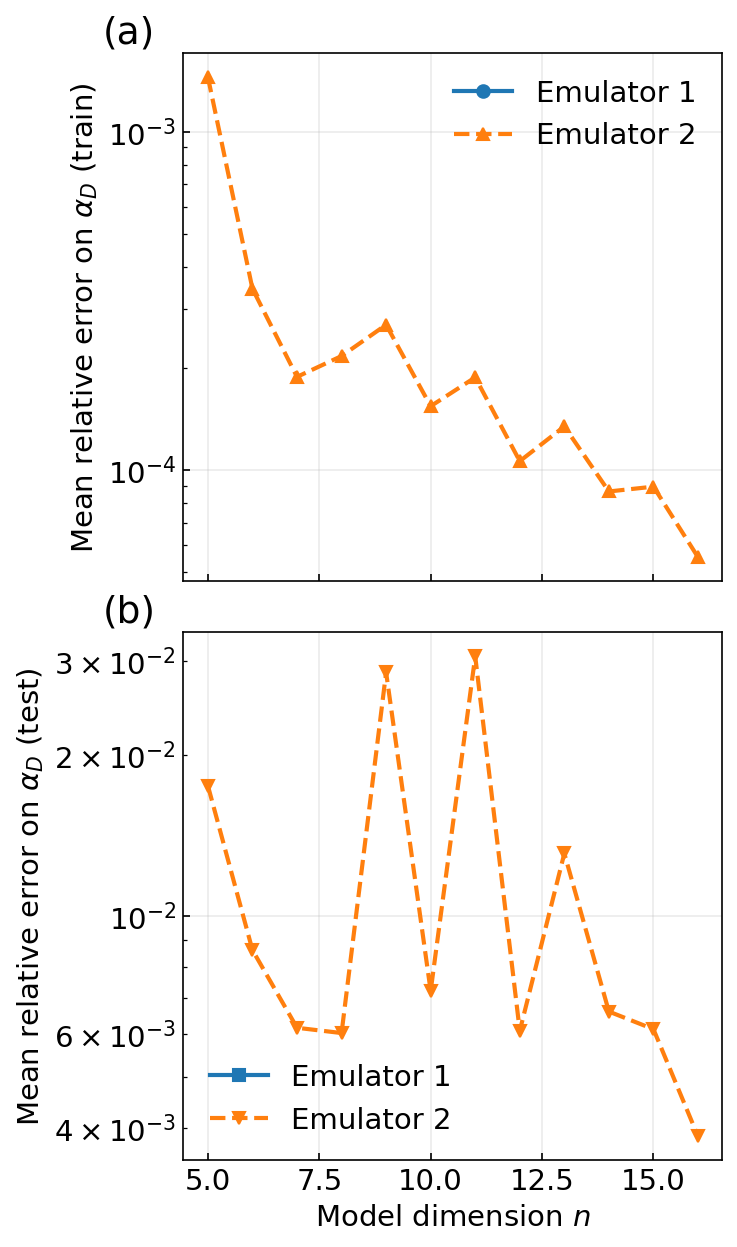

In [3]:
# === EMULATOR 1 + EMULATOR 2: mean relative error on α_D vs n (train & test), single two-panel figure ===
import os, re, sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# --- project helper imports (adjust if needed) ---
sys.path.insert(0, str(Path("..").resolve()))
try:
    from dipoles_exp_param import helper as helper
except Exception:
    import helper  # fallback if it's already on sys.path

# EM2 uses this:
try:
    from dipoles_exp_param import helper as dhelper
except Exception:
    import dipole_helper as dhelper  # fallback

# ---------------- config ----------------
retain = 1.0
n_list = list(range(5, 17))  # e.g., 5..20
runs_em1_root = Path("../dipoles_exp_param/runs_Em1")
runs_em2_root = Path("../dipoles_exp_param/runs_old_Em2")  # used if you saved EM2 runs here
train_set_file = Path("../dipoles_exp_param/train_set.txt")
strength_dir = Path("../dipoles_data_all/total_strength")
alphaD_dir    = Path("../dipoles_data_all/total_alphaD")
out_fig = Path("Emu1_Emu2_alphaD_vs_n_train_test.pdf")

# ---------------- load canonical train set & central point ----------------
train_set = []
with train_set_file.open("r") as f:
    for line in f:
        tup = tuple(map(str, line.strip().split(",")))
        if len(tup) == 2:
            train_set.append(tup)
train_set_set = set(train_set)

combined_ar = np.array(train_set, dtype=float)
centroid = combined_ar.mean(axis=0)
distances = np.linalg.norm(combined_ar - centroid, axis=1)
central_point = tuple(train_set[int(np.argmin(distances))])
c_alpha = float(central_point[0])
c_beta  = float(central_point[1])

# ---------------- pre-scan all available (alpha,beta) pairs & load data once ----------------
# (match EM1’s domain: strength files that ALSO have alphaD)
pattern = re.compile(r"^strength_([0-9.]+)_([0-9.]+)\.out$")
pairs = []            # list[(alpha_str, beta_str)]
strength_list = []    # raw spectra for EM1 eval
alphaD_list = []      # alphaD rows (truth values used by EM1 eval)

for fname in os.listdir(str(strength_dir)):
    m = pattern.match(fname)
    if not m:
        continue
    beta_str, alpha_str = m.group(1), m.group(2)
    sfile = strength_dir / fname
    afile = alphaD_dir / f"alphaD_{beta_str}_{alpha_str}.out"
    if not afile.exists():
        continue
    strength_arr = np.loadtxt(sfile)
    alphaD_arr   = np.loadtxt(afile)
    pairs.append((alpha_str, beta_str))
    strength_list.append(strength_arr)
    alphaD_list.append(alphaD_arr)

pairs = np.array(pairs, dtype=object)
strength_list = list(strength_list)
alphaD_list = list(alphaD_list)

# indices for train/test (same set/order used by both EM1 & EM2)
is_train_mask = np.array([tuple(p) in train_set_set for p in pairs])
train_idx = np.where(is_train_mask)[0]
test_idx  = np.where(~is_train_mask)[0]

# ---------------- helpers ----------------
def load_params_em1(n: int, retain: float):
    """params_{n}_{retain}.txt under runs_em1_root/n{n}_r{retain}/"""
    p = runs_em1_root / f"n{n}_r{retain}" / f"params_best.txt"
    if not p.exists():
        raise FileNotFoundError(p)
    return np.loadtxt(p).astype(np.float32), p

def load_params_em2(n: int):
    """
    Tries typical locations for params_{n}_only_alphaD.txt
    Priority: runs_Em2_root > ../dipoles_exp_param > cwd
    """
    candidates = [
        runs_em2_root / f"n{n}_r1.0" / f"params_{n}_only_alphaD.txt",
        Path(f"../dipoles_exp_param/params_{n}_only_alphaD.txt"),
        Path(f"params_{n}_only_alphaD.txt"),
    ]
    for p in candidates:
        if p.exists():
            return np.loadtxt(p).astype(np.float32), p
    raise FileNotFoundError(f"params_{n}_only_alphaD.txt not found in expected locations.")

def mean_rel_alphaD_for_indices_em1(params_f32, n, idx_list):
    """EM1 evaluation (your exact math)."""
    if len(idx_list) == 0:
        return np.nan
    (opt_D, opt_S1, opt_S2, opt_S3, opt_S4,
     opt_v0, opt_v1, opt_v2, fold, x1, x2, x3, x4) = helper.modified_DS_affine_v(params_f32, n)

    preds, truths = [], []
    for k in idx_list:
        alpha_str, beta_str = pairs[k]
        a = tf.constant(float(alpha_str), dtype=tf.float32)
        b = tf.constant(float(beta_str),  dtype=tf.float32)

        exp1 = tf.exp(-(a - c_alpha) * x1)
        M_true = (opt_D
                  + (a - c_alpha) * opt_S1
                  + (b - c_beta)  * opt_S2
                  + (b - c_beta)  * exp1 * opt_S3)

        eigvals, eigvecs = tf.linalg.eigh(M_true)
        n_i = eigvals.shape[0]
        k_keep = int(round(retain * int(n_i)))
        k_keep = max(1, min(k_keep, int(n_i)))
        left = (int(n_i) - k_keep) // 2
        right = left + k_keep
        eigvals  = eigvals[left:right]
        eigvecs  = eigvecs[:, left:right]

        v_eff = opt_v0 + (a - c_alpha) * opt_v1 + (b - c_beta) * opt_v2
        proj = tf.linalg.matvec(tf.transpose(eigvecs), v_eff)
        B = tf.square(proj)

        mask = tf.cast((eigvals > 1.0), dtype=tf.float32)
        dot_products = B * mask

        x = strength_list[k][:, 0].astype(np.float32)
        _eta = tf.sqrt(fold**2 + (x2 + x3*(a - c_alpha) + x4*(b - c_beta))**2)
        _ = helper.give_me_Lorentzian(x, eigvals, dot_products, _eta)  # not used but kept to mirror your eval

        alphaD_pred = helper.calculate_alphaD(eigvals, B)  # you used unmasked B for αD
        preds.append(float(alphaD_pred.numpy()))
        truths.append(float(alphaD_list[k][2]))

    preds = np.array(preds, dtype=float)
    truths = np.array(truths, dtype=float)
    return float(np.mean(np.abs(preds - truths) / truths))

def mean_rel_alphaD_for_indices_em2(params_f32, n, idx_list):
    """EM2 evaluation via dipole_helper.plot_alphaD_simple over the SAME 'pairs' list."""
    if len(idx_list) == 0:
        return np.nan
    # dhelper expects a list of (alpha,beta) strings in order; use the SAME 'pairs' we built above
    alphaD_pred, alphaD_true, _times = dhelper.plot_alphaD_simple(pairs.tolist(), params_f32, n, central_point)
    alphaD_pred = np.asarray(alphaD_pred, dtype=float)
    alphaD_true = np.asarray(alphaD_true, dtype=float)
    rel = np.abs(alphaD_true - alphaD_pred) / alphaD_true
    return float(np.nanmean(rel[idx_list]))

# ---------------- sweep over n and collect metrics ----------------
means_train_em1, means_test_em1 = [], []
means_train_em2, means_test_em2 = [], []

for n in n_list:
    # EM1
    try:
        p_em1, ppath1 = load_params_em1(n, retain)
        mtr1 = mean_rel_alphaD_for_indices_em1(p_em1, n, train_idx)
        mte1 = mean_rel_alphaD_for_indices_em1(p_em1, n, test_idx)
    except Exception as e:
        print(f"[EM1 skip] n={n}: {e}")
        mtr1 = np.nan; mte1 = np.nan
    means_train_em1.append(mtr1)
    means_test_em1.append(mte1)

    # EM2
    try:
        p_em2, ppath2 = load_params_em2(n)
        mtr2 = mean_rel_alphaD_for_indices_em2(p_em2, n, train_idx)
        mte2 = mean_rel_alphaD_for_indices_em2(p_em2, n, test_idx)
    except Exception as e:
        print(f"[EM2 skip] n={n}: {e}")
        mtr2 = np.nan; mte2 = np.nan
    means_train_em2.append(mtr2)
    means_test_em2.append(mte2)

    print(f"n={n:2d} | EM1 train={mtr1:.6e} test={mte1:.6e}  ||  EM2 train={mtr2:.6e} test={mte2:.6e}")

# ---------------- single two-panel figure with both EM1 & EM2 ----------------
plt.rcParams.update({'font.size': 14, 'xtick.direction': 'in', 'ytick.direction': 'in'})
fig, ax = plt.subplots(2, 1, figsize=(4.8, 8.2), dpi=150, sharex=True, constrained_layout=True)

# (a) train
ax[0].plot(n_list, means_train_em1, marker='o', lw=2, label="Emulator 1")
ax[0].plot(n_list, means_train_em2, marker='^', lw=2, ls='--', label="Emulator 2")
ax[0].set_ylabel(r"Mean relative error on $\alpha_D$ (train)")
ax[0].grid(alpha=0.25)
ax[0].annotate("(a)", (-0.15, 1.02), xycoords="axes fraction", fontsize=18)
ax[0].legend(frameon=False)

# (b) test
ax[1].plot(n_list, means_test_em1, marker='s', lw=2, label="Emulator 1")
ax[1].plot(n_list, means_test_em2, marker='v', lw=2, ls='--', label="Emulator 2")
ax[1].set_xlabel("Model dimension $n$")
ax[1].set_ylabel(r"Mean relative error on $\alpha_D$ (test)")
ax[1].grid(alpha=0.25)
ax[1].annotate("(b)", (-0.15, 1.02), xycoords="axes fraction", fontsize=18)
ax[1].legend(frameon=False)

# Optional: log-scale if needed
ax[0].set_yscale("log"); ax[1].set_yscale("log")

out_fig.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(out_fig, bbox_inches="tight")
print(f"Saved to {out_fig.resolve()}")
plt.show()


Found 11 EM1 run(s), 21 EM2 run(s).


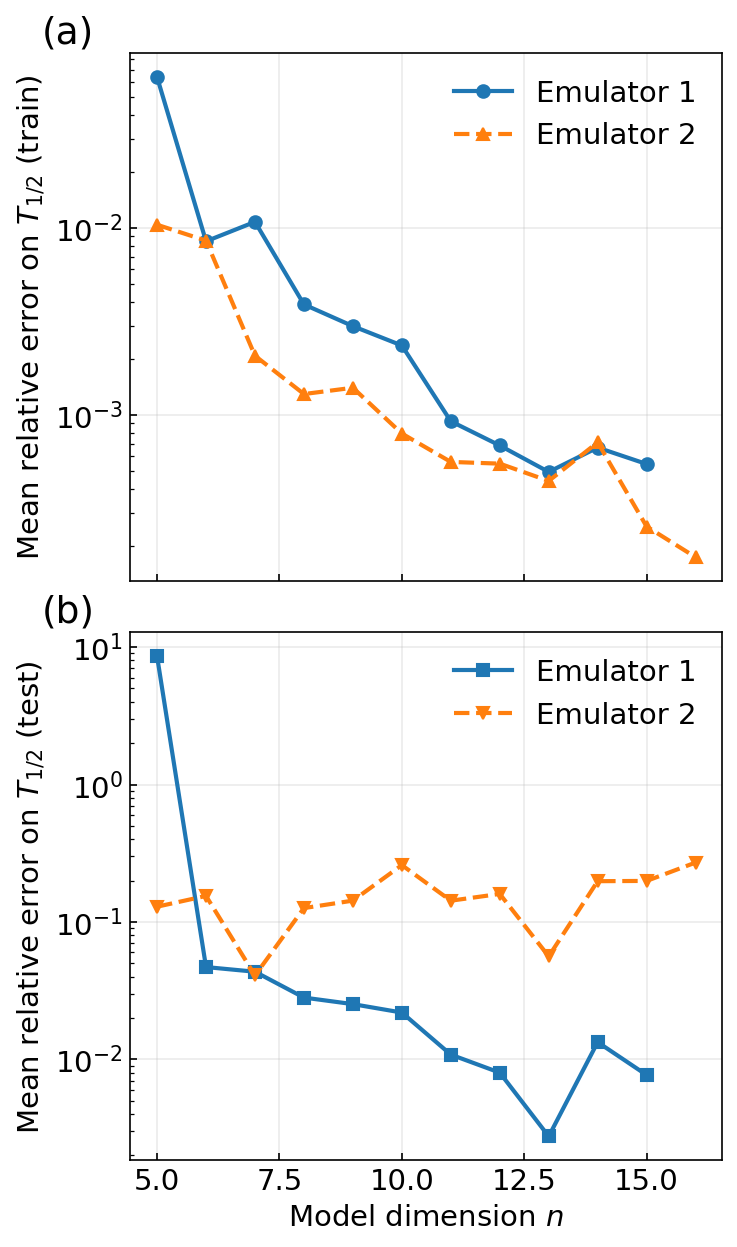

In [44]:
# === JUPYTER ONE-CELL: Beta-decay half-lives — mean relative error vs model dimension n (5..16)
#                       (Emulator 1 & Emulator 2; train & test in one figure) ===
import os, re, sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# --- import your beta-decay helper ---
sys.path.insert(0, str(Path("..").resolve()))
try:
    from Beta_decay import helper as beta_helper
except Exception:
    import helper as beta_helper  # fallback if helper.py is local

# ---------------- CONFIG ----------------
NUC      = "Ni_80"
A, Z     = 80, 28
g_A      = 1.2
DATA_DIR = Path(f"../beta_decay_data_{NUC}")  # where lorm_{NUC}_{beta}_{alpha}.out live
EM1_ROOTS = [Path("../Beta_decay/rus_Em1")/NUC, Path("../Beta_decay/runs_Em1")/NUC]
EM2_ROOTS = [Path("../Beta_decay/runs_Em2")/NUC]
USE_LOG_Y = True

# <<< NEW: n-range filter >>>
N_MIN, N_MAX = 5, 16

# ---------------- small utilities ----------------
def load_train_set(path: Path):
    pts = []
    if not path.exists(): 
        return pts
    with path.open("r") as f:
        for line in f:
            s = line.strip()
            if not s: continue
            a, b = [t.strip() for t in s.split(",")]
            pts.append((a, b))
    return pts

def centroid_like_point(pairs):
    A_ = np.array([float(a) for a,_ in pairs], dtype=float)
    B_ = np.array([float(b) for _,b in pairs], dtype=float)
    cx, cy = (A_.min()+A_.max())/2.0, (B_.min()+B_.max())/2.0
    return min(pairs, key=lambda t: (float(t[0])-cx)**2 + (float(t[1])-cy)**2)

def scan_all_pairs(data_dir: Path, nuc: str):
    pat = re.compile(rf"^lorm_{re.escape(nuc)}_([0-9.]+)_([0-9.]+)\.out$")
    pairs = []
    for fname in sorted(os.listdir(data_dir)):
        m = pat.match(fname)
        if not m: 
            continue
        beta_raw, alpha_raw = m.group(1), m.group(2)
        pairs.append((alpha_raw, beta_raw))  # keep strings
    if not pairs:
        raise RuntimeError(f"No points found under {data_dir}")
    return pairs

def split_indices(combined, train_set):
    ts = set(train_set)
    mask = np.array([tuple(p) in ts for p in combined])
    return np.where(mask)[0], np.where(~mask)[0]

def discover_em1_runs(roots):
    pat = re.compile(r"^params_(\d+)_([0-9.]+)\.txt$")
    runs = []
    for root in roots:
        if not root.exists(): 
            continue
        for dirpath, _, files in os.walk(root):
            files = set(files)
            if "train_set.txt" not in files:
                continue
            for fn in files:
                m = pat.match(fn)
                if not m or "only_HL" in fn or "best" in fn:
                    continue
                n = int(m.group(1)); retain = float(m.group(2))
                runs.append(dict(
                    n=n, retain=retain,
                    params_path=Path(dirpath)/fn,
                    train_set_path=Path(dirpath)/"train_set.txt"
                ))
    runs.sort(key=lambda r: (r["n"], r["retain"], r["params_path"].as_posix()))
    return runs

def discover_em2_runs(roots):
    pat = re.compile(r"^params_(\d+)_only_HL\.txt$")
    runs = []
    for root in roots:
        if not root.exists(): 
            continue
        for dirpath, _, files in os.walk(root):
            files = set(files)
            if "train_set.txt" not in files:
                continue
            for fn in files:
                m = pat.match(fn)
                if not m: 
                    continue
                n = int(m.group(1))
                runs.append(dict(
                    n=n,
                    params_path=Path(dirpath)/fn,
                    train_set_path=Path(dirpath)/"train_set.txt"
                ))
    runs.sort(key=lambda r: (r["n"], r["params_path"].as_posix()))
    return runs

# ---------------- evaluation universe ----------------
combined = scan_all_pairs(DATA_DIR, NUC)
coeffs   = Polynomial(beta_helper.fit_phase_space(0, Z, A, 15)).coef
em1_runs = discover_em1_runs(EM1_ROOTS)
em2_runs = discover_em2_runs(EM2_ROOTS)
if not em1_runs and not em2_runs:
    raise SystemExit("No EM1/EM2 runs found. Check the paths.")
print(f"Found {len(em1_runs)} EM1 run(s), {len(em2_runs)} EM2 run(s).")

# ---------------- evaluate; aggregate by n ----------------
by_n_em1, by_n_em2 = {}, {}

for r in em1_runs:
    if not (N_MIN <= r["n"] <= N_MAX):  # <<< filter by n
        continue
    train_set = load_train_set(r["train_set_path"])
    if not train_set: 
        continue
    central_point = centroid_like_point(train_set)
    idx_train, idx_test = split_indices(combined, train_set)
    params = np.loadtxt(r["params_path"]).astype(np.float64)

    HLs_pred, HLs_true, _ = beta_helper.plot_half_lives(
        combined, params, r["n"], coeffs, g_A, central_point, NUC, r["retain"]
    )
    HLs_pred = np.asarray(HLs_pred, dtype=float)
    HLs_true = np.asarray(HLs_true, dtype=float)
    rel = np.abs(HLs_true - HLs_pred) / np.maximum(HLs_true, 1e-12)
    m_train = float(np.nan) if len(idx_train)==0 else float(np.mean(rel[idx_train]))
    m_test  = float(np.nan) if len(idx_test)==0  else float(np.mean(rel[idx_test]))
    by_n_em1.setdefault(r["n"], []).append(dict(train=m_train, test=m_test))

for r in em2_runs:
    if not (N_MIN <= r["n"] <= N_MAX):  # <<< filter by n
        continue
    train_set = load_train_set(r["train_set_path"])
    if not train_set: 
        continue
    central_point = centroid_like_point(train_set)
    idx_train, idx_test = split_indices(combined, train_set)
    params = np.loadtxt(r["params_path"]).astype(np.float64)

    HLs_pred, HLs_true, _ = beta_helper.plot_half_lives_only_HL(
        combined, params, r["n"], coeffs, g_A, central_point, NUC
    )
    HLs_pred = np.asarray(HLs_pred, dtype=float)
    HLs_true = np.asarray(HLs_true, dtype=float)
    rel = np.abs(HLs_true - HLs_pred) / np.maximum(HLs_true, 1e-12)
    m_train = float(np.nan) if len(idx_train)==0 else float(np.mean(rel[idx_train]))
    m_test  = float(np.nan) if len(idx_test)==0  else float(np.mean(rel[idx_test]))
    by_n_em2.setdefault(r["n"], []).append(dict(train=m_train, test=m_test))

def collapse_by_n(dct, key):
    ns = sorted(dct.keys())
    vals = []
    for n in ns:
        arr = np.array([x[key] for x in dct[n] if np.isfinite(x[key])], dtype=float)
        vals.append(float(np.mean(arr)) if arr.size else np.nan)
    return ns, vals

n_em1, em1_train_mean = collapse_by_n(by_n_em1, "train")
_,     em1_test_mean  = collapse_by_n(by_n_em1, "test")
n_em2, em2_train_mean = collapse_by_n(by_n_em2, "train")
_,     em2_test_mean  = collapse_by_n(by_n_em2, "test")

# unified x-axis (only n in [5,16])
all_n_full = sorted(set(n_em1) | set(n_em2))
all_n = [n for n in all_n_full if N_MIN <= n <= N_MAX]  # <<< enforce range

def values_on(alln, n_list, vals):
    m = {n:v for n,v in zip(n_list, vals)}
    return [m.get(n, np.nan) for n in alln]

em1_train_plot = values_on(all_n, n_em1, em1_train_mean)
em1_test_plot  = values_on(all_n, n_em1, em1_test_mean)
em2_train_plot = values_on(all_n, n_em2, em2_train_mean)
em2_test_plot  = values_on(all_n, n_em2, em2_test_mean)

# ---------------- plot ----------------
plt.rcParams.update({'font.size': 14, 'xtick.direction': 'in', 'ytick.direction': 'in'})
fig, ax = plt.subplots(2, 1, figsize=(4.8, 8.2), dpi=150, sharex=True, constrained_layout=True)

ax[0].plot(all_n, em1_train_plot, marker='o', lw=2, label="Emulator 1")
ax[0].plot(all_n, em2_train_plot, marker='^', lw=2, ls='--', label="Emulator 2")
ax[0].set_ylabel(r"Mean relative error on $T_{1/2}$ (train)")
ax[0].grid(alpha=0.25); ax[0].annotate("(a)", (-0.15, 1.02), xycoords="axes fraction", fontsize=18)
ax[0].legend(frameon=False)

ax[1].plot(all_n, em1_test_plot, marker='s', lw=2, label="Emulator 1")
ax[1].plot(all_n, em2_test_plot, marker='v', lw=2, ls='--', label="Emulator 2")
ax[1].set_xlabel("Model dimension $n$")
ax[1].set_ylabel(r"Mean relative error on $T_{1/2}$ (test)")
ax[1].grid(alpha=0.25); ax[1].annotate("(b)", (-0.15, 1.02), xycoords="axes fraction", fontsize=18)
ax[1].legend(frameon=False)

if USE_LOG_Y:
    ax[0].set_yscale("log"); ax[1].set_yscale("log")

plt.show()


n= 5 | EM1 train=1.328681e-03 test=9.066803e-03  ||  EM2 train=1.722500e-04 test=2.300749e-02
n= 6 | EM1 train=1.160631e-03 test=6.686040e-03  ||  EM2 train=1.591338e-04 test=5.858770e-03
n= 7 | EM1 train=8.940920e-04 test=1.448006e-02  ||  EM2 train=1.599737e-04 test=1.644673e-02
n= 8 | EM1 train=7.155420e-04 test=1.184104e-02  ||  EM2 train=1.183031e-04 test=4.379107e-03
n= 9 | EM1 train=8.392107e-04 test=1.121479e-02  ||  EM2 train=1.395580e-04 test=7.504827e-03
n=10 | EM1 train=6.407222e-04 test=5.128440e-03  ||  EM2 train=1.036120e-04 test=5.515465e-03
n=11 | EM1 train=7.985615e-04 test=8.579530e-03  ||  EM2 train=1.196030e-04 test=4.949327e-03
n=12 | EM1 train=7.948702e-04 test=8.069622e-03  ||  EM2 train=9.608417e-05 test=4.567788e-03
n=13 | EM1 train=4.585276e-04 test=3.768165e-03  ||  EM2 train=1.087645e-04 test=6.830019e-03
n=14 | EM1 train=4.159009e-04 test=5.518962e-03  ||  EM2 train=8.645803e-05 test=6.362613e-03
n=15 | EM1 train=5.179062e-04 test=4.386138e-03  ||  EM2 tra

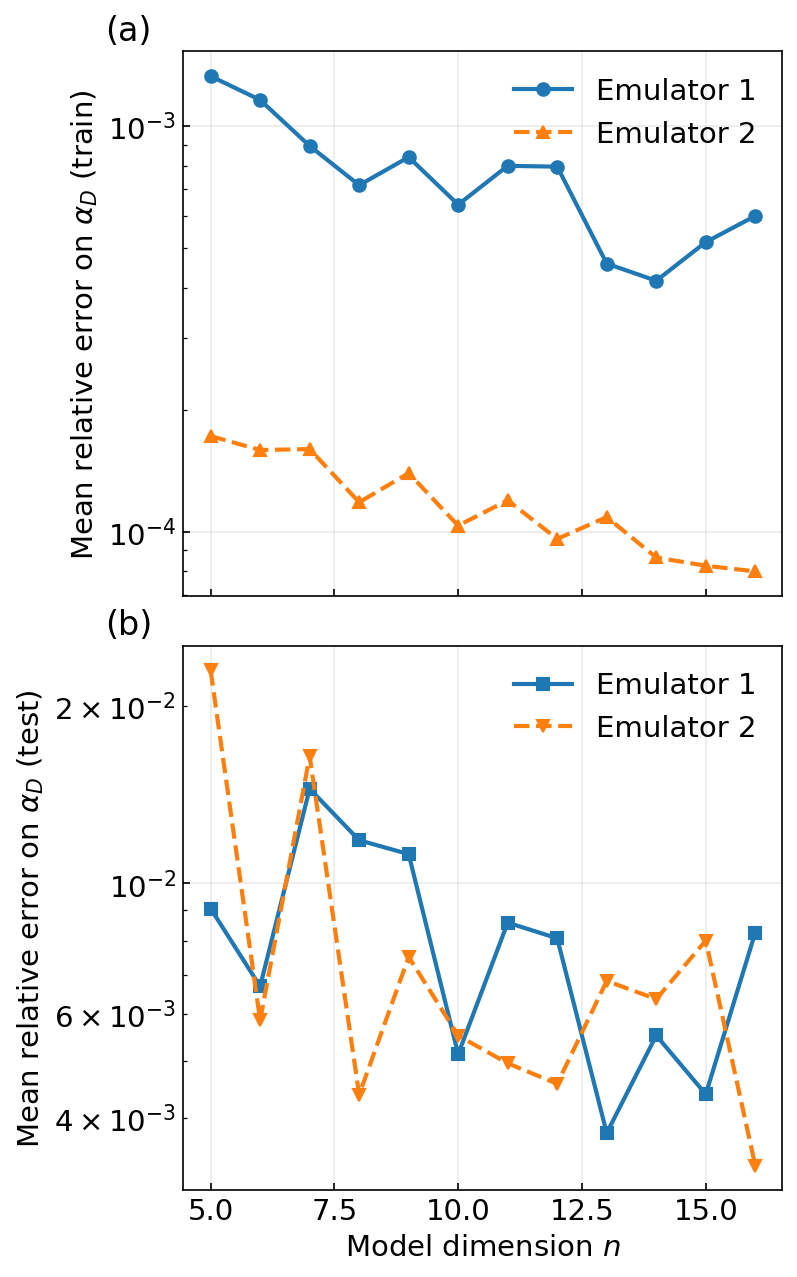

In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Plot mean relative error on alphaD vs PMM dimension n for
# Emulator 1 (mixed loss) and Emulator 2 (alphaD-only).
# Uses your saved params and the canonical train/test split.

import os
import re
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# --- project helper imports (adjust if needed) ---
sys.path.insert(0, str(Path("..").resolve()))
from dipoles_exp_param import helper as helper


# ---------------- Config (adjust if needed) ----------------
retain = 0.6
n_list = list(range(5, 17))  # e.g., 5..16

# Where params live
runs_em1_root = Path("../dipoles_exp_param/runs_Em1")
runs_em2_root = Path("../dipoles_exp_param/runs_Em2")  # new EM2 restarts folder

# Where the canonical split lives (preferred)
train_set_file = Path("../dipoles_exp_param/train_set.txt")

# Data
strength_dir = Path("../dipoles_data_all/total_strength")
alphaD_dir   = Path("../dipoles_data_all/total_alphaD")

# Output figure
out_fig = Path("Emu1_Emu2_alphaD_vs_n_train_test.pdf")



# ---------------- Load train set ----------------
def load_train_set():
    """
    Prefer a global train_set.txt. If not present, try to find one under runs_em2_root/*/train_set.txt.
    """
    if train_set_file.exists():
        pairs = []
        with train_set_file.open("r") as f:
            for line in f:
                tok = tuple(map(str, line.strip().split(",")))
                if len(tok) == 2:
                    pairs.append(tok)
        return pairs

    # Fallback: look for the first train_set.txt in runs_em2_root
    if runs_em2_root.exists():
        for sub in sorted(runs_em2_root.glob("n*/train_set.txt")):
            pairs = []
            with sub.open("r") as f:
                for line in f:
                    tok = tuple(map(str, line.strip().split(",")))
                    if len(tok) == 2:
                        pairs.append(tok)
            if pairs:
                print(f"[info] Using train set from: {sub}")
                return pairs

    raise FileNotFoundError(
        f"train_set.txt not found at {train_set_file} or under {runs_em2_root}/n*/train_set.txt"
    )

train_set_pairs = load_train_set()
train_set_set = set(train_set_pairs)

# ---------------- Pre-scan all available (alpha,beta) with data ----------------
pattern = re.compile(r"^strength_([0-9.]+)_([0-9.]+)\.out$")
pairs = []            # list[(alpha_str, beta_str)]
strength_list = []    # full spectra (for EM1 eval)
alphaD_list = []      # rows with true alphaD (for both EM1/EM2 eval truth)

for fname in os.listdir(str(strength_dir)):
    m = pattern.match(fname)
    if not m:
        continue
    beta_str, alpha_str = m.group(1), m.group(2)
    sfile = strength_dir / fname
    afile = alphaD_dir / f"alphaD_{beta_str}_{alpha_str}.out"
    if not afile.exists():
        continue
    try:
        strength_arr = np.loadtxt(sfile)
        alphaD_arr   = np.loadtxt(afile)
    except Exception:
        continue  # skip malformed files
    pairs.append((alpha_str, beta_str))
    strength_list.append(strength_arr)
    alphaD_list.append(alphaD_arr)

pairs = np.array(pairs, dtype=object)
strength_list = list(strength_list)
alphaD_list = list(alphaD_list)

if len(pairs) == 0:
    raise RuntimeError("No valid (alpha,beta) pairs found with both strength and alphaD files present.")

# ---------------- Central point (from train set) ----------------
# Use the exact train-set pairs to compute center & closest point (alpha,beta)
train_arr = np.array(train_set_pairs, dtype=float)
centroid = train_arr.mean(axis=0)
distances = np.linalg.norm(train_arr - centroid, axis=1)
central_point = tuple(train_set_pairs[int(np.argmin(distances))])
c_alpha = float(central_point[0]); c_beta = float(central_point[1])

# ---------------- Train/Test indices (global, consistent ordering) ----------------
is_train_mask = np.array([tuple(p) in train_set_set for p in pairs])
train_idx = np.where(is_train_mask)[0]
test_idx  = np.where(~is_train_mask)[0]

# Build alphaD truth vectors once
alphaD_truth_all = np.array([float(row[2]) for row in np.vstack(alphaD_list)], dtype=float)

# ---------------- Loaders for parameter files ----------------
def load_params_em1(n: int, retain_val: float):
    """
    Robust loader for EM1:
      - runs_Em1/n{n}_r{retain}/params_best.txt         (preferred)
      - runs_Em1/n{n}_r{retain}/params_.txt (legacy)
      - runs_Em1/n{n}_r{retain}/params.txt              (fallback)
    """
    d = runs_em1_root / f"n{n}_r{retain_val}"
    candidates = [
        d / "params_best.txt",
        d / f"params_{n}_{retain_val}.txt",
        d / "params.txt",
    ]
    for p in candidates:
        if p.exists():
            return np.loadtxt(p).astype(np.float32), p
    raise FileNotFoundError(f"[EM1] params not found for n={n} under {d}")

def load_params_em2(n: int):
    """
    Robust loader for EM2 (new restarts layout):
      - runs_em2/n{n}/params_best_overall_n{n}.txt  (preferred)
      - runs_em2/n{n}/params_{n}_only_alphaD.txt    (legacy)
      - runs_em2/n{n}/restart_00/params_best.txt    (fallback to first restart)
    """
    d = runs_em2_root / f"n{n}"
    candidates = [
        d / f"params_best_overall_n{n}.txt",
        d / f"params_{n}_only_alphaD.txt",
    ]
    for p in candidates:
        if p.exists():
            return np.loadtxt(p).astype(np.float32), p
    # fallback to any restart's best
    for sub in sorted(d.glob("restart_*/params_best.txt")):
        return np.loadtxt(sub).astype(np.float32), sub
    raise FileNotFoundError(f"[EM2] params not found for n={n} under {d}")

# ---------------- EM1: mean rel error on indices ----------------
def mean_rel_alphaD_for_indices_em1(params_f32, n, idx_list):
    """
    Reconstruct alphaD the same way EM1 does:
      - decode matrices/vectors
      - build M(a,b)
      - eigen-decompose, keep central band according to 'retain'
      - compute strengths B and alphaD
    """
    if len(idx_list) == 0:
        return np.nan

    (opt_D, opt_S1, opt_S2, opt_S3, opt_S4,
     opt_v0, opt_v1, opt_v2, fold, x1, x2, x3, x4) = helper.modified_DS_affine_v(params_f32, n)

    preds, truths = [], []
    for k in idx_list:
        alpha_str, beta_str = pairs[k]
        a = tf.constant(float(alpha_str), dtype=tf.float32)
        b = tf.constant(float(beta_str), dtype=tf.float32)

        exp1 = tf.exp(-(a - c_alpha) * x1)
        # As used in your previous EM1 eval code
        M = (opt_D
             + (a - c_alpha) * opt_S1
             + (b - c_beta)  * opt_S2
             + (b - c_beta)  * exp1 * opt_S3)

        eigvals, eigvecs = tf.linalg.eigh(M)
        n_i = eigvals.shape[0]
        k_keep = int(round(retain * int(n_i)))
        k_keep = max(1, min(k_keep, int(n_i)))
        left = (int(n_i) - k_keep) // 2
        right = left + k_keep
        eigvals  = eigvals[left:right]
        eigvecs  = eigvecs[:, left:right]

        v_eff = opt_v0 + (a - c_alpha) * opt_v1 + (b - c_beta) * opt_v2
        proj = tf.linalg.matvec(tf.transpose(eigvecs), v_eff)
        B = tf.square(proj)

        # alphaD as previously computed (unmasked B for alphaD in your scripts)
        alphaD_pred = helper.calculate_alphaD(eigvals, B)
        preds.append(float(alphaD_pred.numpy()))
        truths.append(float(alphaD_list[k][2]))

    preds = np.array(preds, dtype=float)
    truths = np.array(truths, dtype=float)
    return float(np.mean(np.abs(preds - truths) / truths))

# ---------------- EM2: mean rel error on indices ----------------
def mean_rel_alphaD_for_indices_em2(params_f32, n, idx_list):
    """
    Use the same batched alphaD-only function you trained with:
      cost_function_only_alphaD_batched(params, n, eval_points_str, alphaD_true, central_point)
    and compute mean relative error on the selected indices.
    """
    if len(idx_list) == 0:
        return np.nan

    # Build eval subset
    eval_points = [tuple(pairs[k]) for k in idx_list]  # list of (alpha_str, beta_str)
    truths = [float(alphaD_list[k][2]) for k in idx_list]

    # Call helper (returns (cost, alphaD_pred_tf))
    _, alphaD_pred_tf = helper.cost_function_only_alphaD_batched(
        tf.convert_to_tensor(params_f32, dtype=tf.float32),
        n,
        eval_points,
        truths,
        central_point
    )
    preds = np.asarray(alphaD_pred_tf.numpy(), dtype=float)
    rel = np.abs(preds - np.array(truths)) / (np.array(truths) + 1e-12)
    return float(np.mean(rel))

# ---------------- Sweep over n and collect metrics ----------------
means_train_em1, means_test_em1 = [], []
means_train_em2, means_test_em2 = [], []

for n in n_list:
    # EM1
    try:
        p_em1, ppath1 = load_params_em1(n, retain)
        mtr1 = mean_rel_alphaD_for_indices_em1(p_em1, n, train_idx)
        mte1 = mean_rel_alphaD_for_indices_em1(p_em1, n, test_idx)
    except Exception as e:
        print(f"[EM1 skip] n={n}: {e}")
        mtr1 = np.nan; mte1 = np.nan
    means_train_em1.append(mtr1)
    means_test_em1.append(mte1)

    # EM2
    try:
        p_em2, ppath2 = load_params_em2(n)
        mtr2 = mean_rel_alphaD_for_indices_em2(p_em2, n, train_idx)
        mte2 = mean_rel_alphaD_for_indices_em2(p_em2, n, test_idx)
    except Exception as e:
        print(f"[EM2 skip] n={n}: {e}")
        mtr2 = np.nan; mte2 = np.nan
    means_train_em2.append(mtr2)
    means_test_em2.append(mte2)

    print(f"n={n:2d} | EM1 train={mtr1:.6e} test={mte1:.6e}  ||  EM2 train={mtr2:.6e} test={mte2:.6e}")

# ---------------- Plot ----------------
plt.rcParams.update({'font.size': 14, 'xtick.direction': 'in', 'ytick.direction': 'in'})
fig, ax = plt.subplots(2, 1, figsize=(5.2, 8.4), dpi=150, sharex=True, constrained_layout=True)

# (a) train
ax[0].plot(n_list, means_train_em1, marker='o', lw=2, label="Emulator 1")
ax[0].plot(n_list, means_train_em2, marker='^', lw=2, ls='--', label="Emulator 2")
ax[0].set_ylabel(r"Mean relative error on $\alpha_D$ (train)")
ax[0].grid(alpha=0.25)
ax[0].annotate("(a)", (-0.13, 1.02), xycoords="axes fraction", fontsize=16)
ax[0].legend(frameon=False)

# (b) test
ax[1].plot(n_list, means_test_em1, marker='s', lw=2, label="Emulator 1")
ax[1].plot(n_list, means_test_em2, marker='v', lw=2, ls='--', label="Emulator 2")
ax[1].set_xlabel("Model dimension $n$")
ax[1].set_ylabel(r"Mean relative error on $\alpha_D$ (test)")
ax[1].grid(alpha=0.25)
ax[1].annotate("(b)", (-0.13, 1.02), xycoords="axes fraction", fontsize=16)
ax[1].legend(frameon=False)

# Optional: log-scale for readability
ax[0].set_yscale("log")
ax[1].set_yscale("log")

out_fig.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(out_fig, bbox_inches="tight")
print(f"Saved figure to: {out_fig.resolve()}")
plt.show()